<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Introduction to PyTorch

In [1]:
# Install pytorch and torchvision from the command line if you have not already done so
# pip3 install torch torchvision

In [1]:
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Introduction to Tensors

The basic object used in PyTorch is the 'Tensor' which is equivalent to 'ndarray' in Numpy. Similar to Numpy, there are multiple types of Tensors, e.g. Float, Double, Int, Long, etc. Generally we will use FloatTensors, and it is the default type for most functions.

In [5]:
# Create a tensor manually
x_manual = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
x_manual

tensor([[1., 2.],
        [3., 4.]])

In [6]:
x_ones = torch.ones(3,4)
print(x_ones)

x_zeros = torch.zeros(3,4)
print(x_zeros)

x_uniform = torch.rand(3,4)
print(x_uniform)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])


In [7]:
# Create a tensor from a NumPy array
np_array = np.array([1., 2., 3.], dtype=np.float32)
print(np_array)
torch_tensor = torch.from_numpy(np_array)
print(torch_tensor)

[1. 2. 3.]
tensor([1., 2., 3.])


In [8]:
# Create a NumPy array from a tensor
another_tensor = torch.rand(3)
print(another_tensor)
another_np_array = another_tensor.numpy()
print(another_np_array)


tensor([0.0223, 0.1689, 0.2939])
[0.02232575 0.16885895 0.29388845]


In [9]:
# Use indexing to get slices from a tensor
A = torch.rand(3,3)
print(A)
print(A[:, 1])
print(A[:2, :])

tensor([[0.5185, 0.6977, 0.8000],
        [0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742]])
tensor([0.6977, 0.2823, 0.3971])
tensor([[0.5185, 0.6977, 0.8000],
        [0.1610, 0.2823, 0.6816]])


In [10]:
A = torch.rand(3,3)
B = torch.rand(3,3)

# Add tensors together
print(A+B)

# Element-wise multiply tensors
print(A*B)

# Matrix-Matrix multiplication of tensors
print(torch.mm(A,B))

tensor([[0.6892, 0.7036, 0.9845],
        [0.2443, 1.1150, 1.0965],
        [1.0474, 1.4583, 0.4196]])
tensor([[0.1132, 0.0833, 0.0302],
        [0.0075, 0.1722, 0.2700],
        [0.2265, 0.4905, 0.0429]])
tensor([[0.9355, 1.0787, 0.6453],
        [0.3255, 0.3742, 0.2261],
        [0.4069, 1.0051, 0.7265]])


In [11]:
# Check if GPU is available
if torch.cuda.is_available():
    cuda = True
else:
    cuda = False
cuda

False

In [12]:
# Attach a variable to the GPU
mat_gpu = torch.rand(5000, 5000)
if cuda:
    mat_gpu = mat_gpu.cuda()
mat_gpu

tensor([[0.5846, 0.0332, 0.1387,  ..., 0.9534, 0.2357, 0.3334],
        [0.8576, 0.6120, 0.8924,  ..., 0.3778, 0.3465, 0.4203],
        [0.1008, 0.9075, 0.2329,  ..., 0.8757, 0.6707, 0.0709],
        ...,
        [0.9011, 0.0352, 0.5583,  ..., 0.3135, 0.2705, 0.3187],
        [0.0967, 0.0548, 0.4999,  ..., 0.4541, 0.5116, 0.8959],
        [0.6136, 0.4996, 0.0217,  ..., 0.3558, 0.1079, 0.0682]])

## Autograd
The key thing that PyTorch provides us is its Autograd capability which provides automatic differentiation. A Tensor keeps its value and the gradient with respect to this Tensor value. Almost all of built-in operations in PyTorch supports automatic differentiation. To use it we can call `.backward()` on a computation graph, e.g. neural network, after we finish our computation on the graph, and we can automatically get the accumulated gradient for each Tensor (which has specified `requires_grad=True`) in the computational graph

In [13]:
x = torch.tensor(2.0, requires_grad=False)
w = torch.tensor(0.5, requires_grad=True)
b = torch.tensor(0.1, requires_grad=True)
print('x =',x)
print('w =',w)
print('b =',b)

# Define a computational graph
y = w*x + b #y = 0.5x + 0.1 and y(2) = 1.1
print('y =',y)

x = tensor(2.)
w = tensor(0.5000, requires_grad=True)
b = tensor(0.1000, requires_grad=True)
y = tensor(1.1000, grad_fn=<AddBackward0>)


Now let's calculate the gradient (derivative) of the above function y=wx+b with respect to our weight w and bias term b.  We can calculate them manually:

For w:
$$
\frac{\partial y}{\partial w} = \frac{\partial}{\partial w}\left(wx + b\right) = x\\
\text{and}\\
\displaystyle \frac{\partial y}{\partial w}\Bigr|_{x=2} = 2 
$$
For b:
$$
\frac{\partial y}{\partial b} = \frac{\partial}{\partial b}\left(wx + b\right) = 1\\
\text{and}\\
\displaystyle \frac{\partial y}{\partial b}\Bigr|_{x=2} = 1 
$$

In [14]:
# Compute gradients of y with respect to each variable x,w,b
y.backward()

print('Gradient with respect to w:',w.grad)
print('Gradient with respect to b:',b.grad)

Gradient with respect to w: tensor(2.)
Gradient with respect to b: tensor(1.)


## Feed-forward neural network

To demonstrate a feed-forward neural network in PyTorch, we will use the University of Wisconsin breast cancer dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)
X,y= np.array(X),np.array(y)

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Let's scale our data to help the algorithm converge faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 1: Set up dataloaders for our data
The first step is to set up the dataloaders to feed our data into the model.  We first create a `TensorDataset` for our training data and our test data.  Then we create `DataLoaders` for the training and test data which allow us to iteratively feed the data into our model in batches (called "mini-batches") of a size that we can specify.

In [3]:
# Set random seeds
torch.manual_seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed(0)

# Convert training and test data to TensorDatasets
trainset = TensorDataset(torch.from_numpy(X_train_scaled.astype('float32')), 
                         torch.from_numpy(y_train.astype('float32')))
testset = TensorDataset(torch.from_numpy(X_test_scaled.astype('float32')), 
                        torch.from_numpy(y_test.astype('float32')))

# Create Dataloaders for our training and test data to allow us to iterate over minibatches 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False)

### Step 2: Define our neural network architecture
Next, we will define a model, feed-forward neural network for this chapter..
For simplicity, we will use 3-layer, 2 hidden layers and 1 hidden-to-output layer, feed-forward net. Each layer is a fully-connected layer where the module `torch.nn.Linear` is the implementation of it. Also, we will apply ReLU activation for each layer.

Basically, we are required to define a member method of `forward(self, x)` when we define a class for any customized network. It represents a forward pass of a computational graph and a backward pass (back-propagation) with automatic differentiation will be performed later based on this forward definition.

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNet(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        super(FeedForwardNet, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.out = nn.Linear(n_hidden2, n_output)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = torch.sigmoid(self.out(x))
        return x

In [5]:
# Instantiate our neural network
net = FeedForwardNet(n_input=X_train_scaled.shape[1], n_hidden1=50, n_hidden2=20, n_output=1)

Alternatively, PyTorch gives us an easy way to define a model layer by layer using `nn.Sequential()` rather than creating a model class as we did above.  Here we define the same model as above much more simply:

In [6]:
# Build a feed-forward network
n_input = X_train_scaled.shape[1]
n_hidden1 = 50
n_hidden2 = 20
n_output = 1

net = nn.Sequential(nn.Linear(n_input, n_hidden1),  # hidden layer 1
                      nn.ReLU(), # hidden layer 1 activation
                      nn.Linear(n_hidden1, n_hidden2), # hidden layer 2
                      nn.ReLU(), # hidden layer 2 activation
                      nn.Linear(n_hidden2, n_output), # output layer
                      nn.Sigmoid()) # use sigmoid as output activation

### Step 3: Define a cost / loss function and optimizer
We will use Binary Cross Entropy as our loss function, which is usually named `criterion` in PyTorch.  For our optimizer we will use SGD.

When we create an optimizer in PyTorch, we need to pass in the parameters that we want to optimize (train), which are our weights. We can retrieve all trainable parameters of the model by calling `model.parameters()`.

In [7]:
import torch.optim as optim

# Define the cost / loss function
criterion = nn.BCELoss()

# Define the method of updating the weights each iteration (e.g. gradient descent)
optimizer = optim.SGD(net.parameters(), lr=0.01)

### Step 4: Train the model
To train our model, we perform the following four steps in a loop, using one input mini-batch at a time:  
    1) Make a forward pass through the network to calculate the network output  
    2) Use the network output to calculate the cost/loss  
    3) Calculate the gradient of the cost/loss with respect to the weights by performing a backward pass through the network with loss.backward()  
    4) Update the weights by taking a step with the optimizer

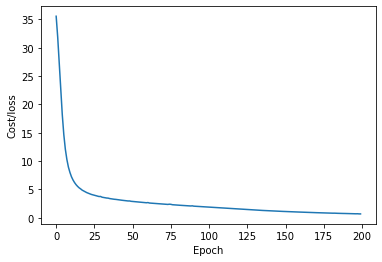

In [9]:
num_iter = 200
cost = []
for epoch in range(num_iter):

    running_loss = 0.0
    
    for i, data in enumerate(trainloader):
        
        # Get the inputs X and labels y for the minibatch
        inputs, labels = data

        # Zero the gradients of the weights each iteration
        optimizer.zero_grad()

        # Calculate the predictions and the cost/loss
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Use autograd to calculate the gradient of the cost with respect to each weight
        loss.backward()
        
        # Use the optimizer to do the weights update
        optimizer.step()

        # Add the loss to running loss for the epoch
        running_loss += loss.item()
        
    cost.append(running_loss)
        
plt.plot(cost)
plt.xlabel('Epoch')
plt.ylabel('Cost/loss')
plt.show()

### Step 5: Evaluate the model on the validation/test set

In [34]:
# Turn off autograd
with torch.no_grad():
    
    # Set the model to evaluation mode
    net.eval()

    # Set up lists to store true and predicted values
    y_true = y_test.tolist
    test_preds = []

    # Calculate the predictions on the test set and add to list
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        test_preds.extend(outputs.data.numpy().flatten().tolist())

    # Convert the predictions to discrete and calculate the accuracy
    test_preds = np.round(test_preds)
    test_acc = np.sum(test_preds==y_test)/len(y_test)
    print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.974
